## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Reading the data

In [2]:
df= pd.read_csv(r"E:\DS\Intern task\Data_Science_Internship - Dump.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [4]:
df.describe()

,Unnamed: 0
count,46608.00000
mean,23303.50000
std,13454.71501
min,0.00000
25%,11651.75000
50%,23303.50000
75%,34955.25000
max,46607.00000


# Pre-Processing

## Checking Missing Values in the data

In [5]:
df.isna().sum()
#There are na values in the data

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [6]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [7]:
df["lost_reason"] = pd.DataFrame(mode_imputer.fit_transform(df[["lost_reason"]]))
df["budget"] = pd.DataFrame(mode_imputer.fit_transform(df[["budget"]]))
df["lease"] = pd.DataFrame(mode_imputer.fit_transform(df[["lease"]]))
df["movein"] = pd.DataFrame(mode_imputer.fit_transform(df[["movein"]]))
df["room_type"] = pd.DataFrame(mode_imputer.fit_transform(df[["room_type"]]))

In [8]:
df.isna().sum()

Unnamed: 0        0
Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
room_type         0
lead_id           0
dtype: int64

### There is no missing value 

## Identify duplicates records in the data

In [9]:
duplicate = df.duplicated()
duplicate
sum(duplicate)

0

### There are no duplicates in the data

In [10]:
df.head(10)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,10/09/22,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Ensuite,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5,5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,10/09/22,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6,6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,10/09/22,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...
7,7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee

### Using label encoding to convert the categorical data to numeric data as the given features has some kind of order or hierarchy

In [11]:
# Creating instance of labelencoder
labelencoder = LabelEncoder()

In [12]:
df['Agent_id'] = labelencoder.fit_transform(df['Agent_id'])
df['lost_reason'] = labelencoder.fit_transform(df['lost_reason'])
df['budget'] = labelencoder.fit_transform(df['budget'])
df['lease'] = labelencoder.fit_transform(df['lease'])
df['movein'] = labelencoder.fit_transform(df['movein'])
df['source'] = labelencoder.fit_transform(df['source'])
df['source_city'] = labelencoder.fit_transform(df['source_city'])
df['source_country'] = labelencoder.fit_transform(df['source_country'])
df['utm_source'] = labelencoder.fit_transform(df['utm_source'])
df['utm_medium'] = labelencoder.fit_transform(df['utm_medium'])
df['des_city'] = labelencoder.fit_transform(df['des_city'])
df['des_country'] = labelencoder.fit_transform(df['des_country'])
df['room_type'] = labelencoder.fit_transform(df['room_type'])
df['lead_id'] = labelencoder.fit_transform(df['lead_id'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  int32 
 2   status          46608 non-null  object
 3   lost_reason     46608 non-null  int32 
 4   budget          46608 non-null  int32 
 5   lease           46608 non-null  int32 
 6   movein          46608 non-null  int32 
 7   source          46608 non-null  int32 
 8   source_city     46608 non-null  int32 
 9   source_country  46608 non-null  int32 
 10  utm_source      46608 non-null  int32 
 11  utm_medium      46608 non-null  int32 
 12  des_city        46608 non-null  int32 
 13  des_country     46608 non-null  int32 
 14  room_type       46608 non-null  int32 
 15  lead_id         46608 non-null  int32 
dtypes: int32(14), int64(1), object(1)
memory usage: 3.2+ MB


### The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.

In [14]:
data = df[(df['status'] == 'WON') | (df['status'] == 'LOST')]

In [15]:
### Coverting status to numeric variable
data['status'] = labelencoder.fit_transform(data['status'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13416\3448420146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status'] = labelencoder.fit_transform(data['status'])


## Feature Selection using Pearson Correlation coefficient

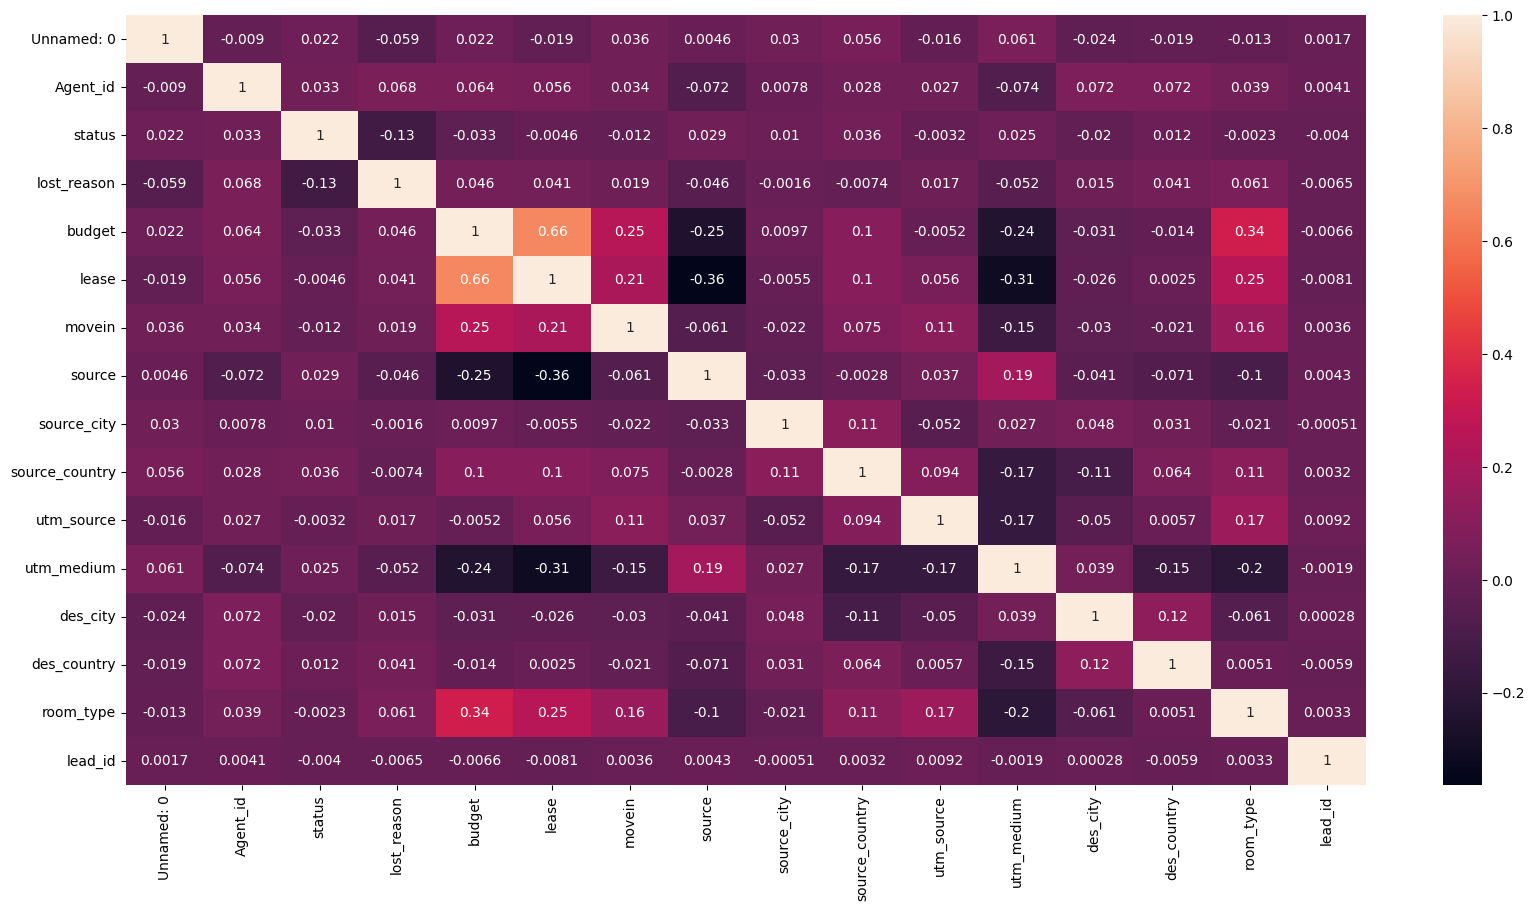

In [16]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Checking for multicollenearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

In [18]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

           feature        VIF
0       Unnamed: 0   3.963946
1         Agent_id   3.186625
2           status   1.095646
3      lost_reason  10.017353
4           budget   9.763345
5            lease  10.025710
6           movein   4.544171
7           source  11.101624
8      source_city   5.519146
9   source_country  10.451285
10      utm_source  11.750140
11      utm_medium   1.712964
12        des_city   4.243819
13     des_country  29.535387
14       room_type   1.458047
15         lead_id   3.890047


###### Dropping des_country and utm_source as it shows more VIF value as well as agent_id as it makes no sense for the prediction

In [19]:
data= data.drop(['des_country', 'utm_source', 'Agent_id', 'Unnamed: 0' ], axis=1)

In [20]:
### Again Checking VIF value

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

           feature       VIF
0           status  1.088863
1      lost_reason  8.777072
2           budget  0.123697
3            lease -6.398513
4           movein -2.439166
5           source -1.481772
6      source_city  0.017047
7   source_country  9.267546
8       utm_medium  1.684859
9         des_city  3.859370
10       room_type  1.429589
11         lead_id  0.000354


<AxesSubplot: xlabel='status'>

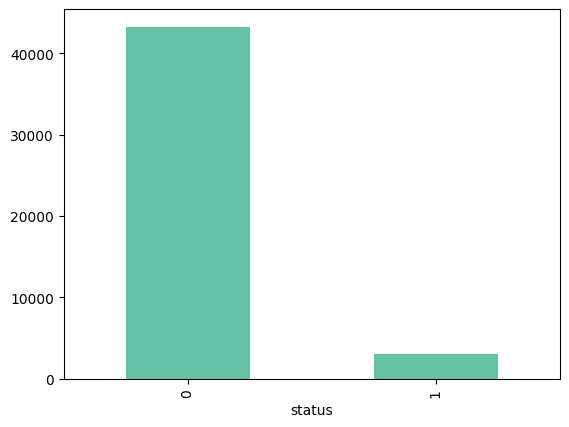

In [21]:
data.pivot_table(index='status', aggfunc='size').plot(kind='bar')

### Here we can see the target variable is imbalanced 

#### To make the data balanced we will use SMOTE

### Splitting data into train and test

In [22]:
X= data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]]
y= data.iloc[:,0]

In [23]:
### SMOTE
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

In [24]:
# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [26]:
X_train.shape, X_test.shape

((69190, 11), (17298, 11))

# Model Building
#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Instantiate the logistic regression model
lr = LogisticRegression(random_state=42)

In [28]:
# Fit the model on the training data
lr.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [29]:
# Predict on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model using a confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True negatives:", tn)
print("False positives:", fp)
print("False negatives:", fn)
print("True positives:", tp)

True negatives: 4393
False positives: 4224
False negatives: 2836
True positives: 5845


In [30]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
lr = LogisticRegression(random_state=42)

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr.predict(X_test)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#####  calculating precision, accuracy, recall, and F1-score on both the training and testing data:

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics on the training data
train_accuracy_lr = accuracy_score(y_train, lr.predict(X_train))
train_precision = precision_score(y_train, lr.predict(X_train))
train_recall = recall_score(y_train, lr.predict(X_train))
train_f1 = f1_score(y_train, lr.predict(X_train))

In [32]:
# Calculate the evaluation metrics on the testing data
test_accuracy_lr = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

In [33]:
# Print the evaluation metrics
print("Training accuracy lr:", train_accuracy_lr)
print("Training precision:", train_precision)
print("Training recall:", train_recall)
print("Training F1-score:", train_f1)

print("Testing accuracy lr:", test_accuracy_lr)
print("Testing precision:", test_precision)
print("Testing recall:", test_recall)
print("Testing F1-score:", test_f1)

Training accuracy lr: 0.5940453822806764
Training precision: 0.5808909876820828
Training recall: 0.67265573011602
Training F1-score: 0.6234145818250073
Testing accuracy lr: 0.5918603306740664
Testing precision: 0.5804945873473036
Testing recall: 0.6733095265522405
Testing F1-score: 0.6234666666666667


In [34]:
# Evaluate the model using a confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True negatives:", tn)
print("False positives:", fp)
print("False negatives:", fn)
print("True positives:", tp)

True negatives: 4393
False positives: 4224
False negatives: 2836
True positives: 5845


#### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision tree model
dt = DecisionTreeClassifier(random_state=42)


In [36]:
# Fit the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Predict on the training and testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [38]:
# Calculate the evaluation metrics on the training data
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

In [39]:
# Calculate the evaluation metrics on the testing data
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)


In [40]:
# Print the evaluation metrics and confusion matrices
print("Training accuracy dt:", train_accuracy_dt)
print("Training precision:", train_precision)
print("Training recall:", train_recall)
print("Training F1-score:", train_f1)
print("Training confusion matrix:\n", train_confusion_matrix)

print("Testing accuracy dt:", test_accuracy_dt)
print("Testing precision:", test_precision)
print("Testing recall:", test_recall)
print("Testing F1-score:", test_f1)
print("Testing confusion matrix:\n", test_confusion_matrix)

Training accuracy dt: 1.0
Training precision: 1.0
Training recall: 1.0
Training F1-score: 1.0
Training confusion matrix:
 [[34627     0]
 [    0 34563]]
Testing accuracy dt: 0.9651982888195167
Testing precision: 0.9658632222350363
Testing recall: 0.9647506047690358
Testing F1-score: 0.9653065928999539
Testing confusion matrix:
 [[8321  296]
 [ 306 8375]]


##### Here decision tree model is Underfitted

### Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

# Instantiate the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their search ranges
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [42]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    dt,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [46]:
# Print the best hyperparameters and their corresponding F1-score
print("Best hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-score: 0.9695916508510909


### Tuned Decision tree

In [53]:
# Instantiate the decision tree model with the best hyperparameters from grid search
dt_tuned = DecisionTreeClassifier(
    max_depth=grid_search.best_params_["max_depth"],
    min_samples_split=grid_search.best_params_["min_samples_split"],
    min_samples_leaf=grid_search.best_params_["min_samples_leaf"],
    random_state=42,
)

# Train the decision tree model on the training data
dt_tuned.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = dt_tuned.predict(X_train)
y_test_pred = dt_tuned.predict(X_test)

In [54]:
# Calculate the evaluation metrics for the training data
train_acc_tuned = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Calculate the evaluation metrics for the testing data
test_acc_tuned = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

In [55]:
# Print the evaluation metrics for the training data
print("Train accuracy tuned:", train_acc_tuned)
print("Train precision:", train_prec)
print("Train recall:", train_rec)
print("Train F1-score:", train_f1)
print("Train confusion matrix:\n", train_cm)

# Print the evaluation metrics for the testing data
print("Test accuracy tuned:", test_acc_tuned)
print("Test precision:", test_prec)
print("Test recall:", test_rec)
print("Test F1-score:", test_f1)
print("Test confusion matrix:\n", test_cm)

Train accuracy tuned: 0.9837548778725249
Train precision: 0.9773862890100791
Train recall: 0.9903943523420999
Train F1-score: 0.9838473256114736
Train confusion matrix:
 [[33835   792]
 [  332 34231]]
Test accuracy tuned: 0.9698231009365245
Test precision: 0.9641597451359654
Test recall: 0.9761548208731713
Test F1-score: 0.9701202060675442
Test confusion matrix:
 [[8302  315]
 [ 207 8474]]


## We can create more machine learning models if we choose. Here, we can see that the tuned decision tree model has the highest accuracy, thus we can use it in the future.